In [6]:
import pandas as pd
import numpy as np
import os, sys

In [7]:
df= pd.read_csv('data/complaints_transformed_nontransformed_allfeatures.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558723 entries, 0 to 558722
Data columns (total 41 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   complaint_id                     558723 non-null  int64  
 1   submitted_via                    558723 non-null  object 
 2   date_received                    558723 non-null  object 
 3   date_sent_to_company             558723 non-null  object 
 4   timely_response                  558723 non-null  object 
 5   lag_submit_to_send               558723 non-null  int64  
 6   year                             558723 non-null  int64  
 7   month                            558723 non-null  int64  
 8   week                             558723 non-null  int64  
 9   day                              558723 non-null  int64  
 10  product                          558723 non-null  object 
 11  sub_product                      374308 non-null  object 
 12  is

In [8]:
df[['company_response_to_consumer', 'company_response_to_consumer_le']].drop_duplicates()

,company_response_to_consumer,company_response_to_consumer_le
0,Closed,0
1,Closed with explanation,1
4,Closed with monetary relief,2
6,Closed with non-monetary relief,3


In [9]:
df.isna().sum()

complaint_id                            0
submitted_via                           0
date_received                           0
date_sent_to_company                    0
timely_response                         0
lag_submit_to_send                      0
year                                    0
month                                   0
week                                    0
day                                     0
product                                 0
sub_product                        184415
issue                                   0
sub_issue                          328983
company                                 0
state                                   0
consumer_consent_provided          344453
company_response_to_consumer            0
consumer_disputed                       0
submitted_via_le                        0
timely_response_le                      0
lag_submit_to_send_mms                  0
product_le                              0
sub_product_le                    

In [10]:
X = df[['submitted_via_le', 'timely_response_le',
       'year', 'month', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le']]
y = df['company_response_to_consumer_le']

In [11]:
import pycaret
pycaret.__version__

'3.0.0'

In [12]:
# import pycaret classification and init setup
from pycaret.classification import *
help(setup)

Help on function setup in module pycaret.classification.functional:

setup(data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, data_func: Union[Callable[[], Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame]], NoneType] = None, target: Union[int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = -1, index: Union[bool, int, str, list, tuple, numpy.ndarray, pandas.core.series.Series] = True, train_size: float = 0.7, test_data: Union[dict, list, tuple, numpy.ndarray, scipy.sparse._base.spmatrix, pandas.core.frame.DataFrame, NoneType] = None, ordinal_features: Union[Dict[str, list], NoneType] = None, numeric_features: Union[List[str], NoneType] = None, categorical_features: Union[List[str], NoneType] = None, date_features: Union[List[str], NoneType] = None, text_features: Union[List[str], NoneType] = None, ignore_features: Union[List[str], NoneType] = None, keep_

In [13]:
dfm=df[['submitted_via_le', 'timely_response_le',
       'year', 'month', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'company_ce', 'state_le', 
       'consumer_consent_provided_le', 'company_response_to_consumer_le']]

dfm.isna().sum()

submitted_via_le                        0
timely_response_le                      0
year                                    0
month                                   0
day                                     0
product_le                              0
sub_product_le                     184415
issue_le                                0
sub_issue_le                       328983
company_ce                              0
state_le                                0
consumer_consent_provided_le       344453
company_response_to_consumer_le         0
dtype: int64

In [14]:
dfm.fillna(-1, inplace=True)

In [15]:
s = setup(dfm,
       target = 'company_response_to_consumer_le', 
       categorical_features=['submitted_via_le', 'timely_response_le', 'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le', 'state_le', 'consumer_consent_provided_le'],
       session_id = 125, 
       n_jobs=45,
       use_gpu=True,
       preprocess=False,
       normalize=False,
       )

Loading profile... Please Wait!


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [17]:
models().index

Index(['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf',
       'qda', 'ada', 'gbc', 'lda', 'et', 'xgboost', 'lightgbm', 'catboost',
       'dummy'],
      dtype='object', name='ID')

In [20]:
help(tune_model)

Help on function tune_model in module pycaret.classification.functional:

tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = True, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any
    This function tunes the hyperparameters of a given estimator. The output of
    this function is a score grid with CV scores by fold of the best selected
    model based on ``optimize`` parameter. Metrics evaluated during CV can be
    accessed using the ``get_metrics`` function. Custom metrics can be added
    or 

In [21]:
help(compare_models)

Help on function compare_models in module pycaret.classification.functional:

compare_models(include: Union[List[Union[str, Any]], NoneType] = None, exclude: Union[List[str], NoneType] = None, fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, sort: str = 'Accuracy', n_select: int = 1, budget_time: Union[float, NoneType] = None, turbo: bool = True, errors: str = 'ignore', fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, experiment_custom_tags: Union[Dict[str, Any], NoneType] = None, probability_threshold: Union[float, NoneType] = None, engine: Union[Dict[str, str], NoneType] = None, verbose: bool = True, parallel: Union[pycaret.internal.parallel.parallel_backend.ParallelBackend, NoneType] = None) -> Union[Any, List[Any]]
    This function trains and evaluates performance of all estimators available in the
    model library using cross validation. The output of this function is a score grid
    with average cross val

In [22]:
best = compare_models(verbose=True, include=['xgboost', 'lightgbm',
                                             'rf', 
                                             'dt', 'svm', 'knn'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:50:31
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8041,0.8120,0.8041,0.7808,0.7567,0.2519,0.3162,1.0610
xgboost,Extreme Gradient Boosting,0.8037,0.8116,0.8037,0.7776,0.7598,0.2643,0.3201,2.0560
rf,Random Forest Classifier,0.7873,0.7649,0.7873,0.7497,0.7540,0.2654,0.2896,14.7520
knn,K Neighbors Classifier,0.7593,0.6380,0.7593,0.6984,0.7155,0.1393,0.1578,9.5870
dt,Decision Tree Classifier,0.7216,0.6389,0.7216,0.7272,0.7243,0.2607,0.2608,2.5860
svm,SVM - Linear Kernel,0.6833,0.0000,0.6833,0.6455,0.6267,0.0405,0.0529,42.2300


In [23]:
lightgbm= create_model('lightgbm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:02:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8024,0.8129,0.8024,0.7775,0.7545,0.2448,0.3078
1,0.8034,0.8095,0.8034,0.7786,0.7565,0.2512,0.3134
2,0.8056,0.8122,0.8056,0.7827,0.7587,0.2586,0.3233
3,0.8032,0.8116,0.8032,0.7798,0.7546,0.2445,0.3096
4,0.8038,0.8132,0.8038,0.7790,0.7569,0.2531,0.3157
5,0.8052,0.8136,0.8052,0.7833,0.7578,0.2557,0.3214
6,0.8051,0.8110,0.8051,0.7830,0.7571,0.2529,0.3198
7,0.8035,0.8142,0.8035,0.7807,0.7544,0.2429,0.3106
8,0.8046,0.8088,0.8046,0.7814,0.7585,0.2580,0.3201


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
xgboost= create_model('xgboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:03:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8022,0.8128,0.8022,0.7747,0.7585,0.2606,0.3144
1,0.8030,0.8084,0.8030,0.7761,0.7593,0.2627,0.3175
2,0.8039,0.8113,0.8039,0.7767,0.7605,0.2675,0.3223
3,0.8026,0.8117,0.8026,0.7754,0.7581,0.2588,0.3145
4,0.8035,0.8114,0.8035,0.7764,0.7599,0.2650,0.3199
5,0.8045,0.8138,0.8045,0.7791,0.7611,0.2686,0.3246
6,0.8058,0.8114,0.8058,0.7816,0.7619,0.2706,0.3291
7,0.8038,0.8129,0.8038,0.7785,0.7593,0.2617,0.3193
8,0.8034,0.8078,0.8034,0.7782,0.7590,0.2607,0.3174


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
rf= create_model('rf')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:03:39
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7874,0.7601,0.7874,0.7495,0.7536,0.2632,0.2880
1,0.7881,0.7646,0.7881,0.7517,0.7556,0.2711,0.2947
2,0.7879,0.7648,0.7879,0.7488,0.7533,0.2618,0.2876
3,0.7878,0.7660,0.7878,0.7495,0.7539,0.2651,0.2899
4,0.7861,0.7649,0.7861,0.7494,0.7526,0.2606,0.2846
5,0.7869,0.7642,0.7869,0.7500,0.7549,0.2701,0.2926
6,0.7873,0.7646,0.7873,0.7487,0.7535,0.2631,0.2879
7,0.7874,0.7647,0.7874,0.7495,0.7543,0.2661,0.2902
8,0.7861,0.7642,0.7861,0.7473,0.7531,0.2636,0.2868


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
dt= create_model('dt')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:05:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7217,0.6367,0.7217,0.7265,0.7240,0.2591,0.2591
1,0.7225,0.6373,0.7225,0.7265,0.7245,0.2588,0.2589
2,0.7208,0.6331,0.7208,0.7247,0.7227,0.2537,0.2538
3,0.7221,0.6424,0.7221,0.7288,0.7254,0.2648,0.2649
4,0.7228,0.6404,0.7228,0.7278,0.7252,0.2624,0.2625
5,0.7201,0.6413,0.7201,0.7288,0.7243,0.2650,0.2652
6,0.7190,0.6354,0.7190,0.7247,0.7218,0.2541,0.2542
7,0.7193,0.6352,0.7193,0.7252,0.7222,0.2552,0.2553
8,0.7208,0.6381,0.7208,0.7257,0.7232,0.2565,0.2566


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
svm= create_model('svm')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:06:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Linear Kernel


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7729,0.0000,0.7729,0.6530,0.6905,0.0264,0.0512
1,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
2,0.7707,0.0000,0.7707,0.6645,0.6885,0.0247,0.0463
3,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
4,0.7084,0.0000,0.7084,0.6567,0.6813,0.1115,0.1142
5,0.7495,0.0000,0.7495,0.6711,0.6994,0.0973,0.1106
6,0.5575,0.0000,0.5575,0.6859,0.5851,0.1086,0.1259
7,0.1647,0.0000,0.1647,0.6520,0.1835,0.0147,0.0396
8,0.7705,0.0000,0.7705,0.6483,0.6890,0.0221,0.0409


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
knn= create_model('knn')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:14:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7598,0.6329,0.7598,0.6993,0.7165,0.1430,0.1615
1,0.7582,0.6395,0.7582,0.6969,0.7146,0.1370,0.1548
2,0.7592,0.6391,0.7592,0.6973,0.7149,0.1377,0.1562
3,0.7595,0.6388,0.7595,0.6985,0.7155,0.1390,0.1577
4,0.7581,0.6420,0.7581,0.6974,0.7148,0.1377,0.1554
5,0.7600,0.6388,0.7600,0.6994,0.7158,0.1398,0.1588
6,0.7609,0.6333,0.7609,0.7004,0.7169,0.1429,0.1623
7,0.7596,0.6385,0.7596,0.6992,0.7160,0.1403,0.1589
8,0.7583,0.6351,0.7583,0.6956,0.7135,0.1321,0.1504


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
tune_model(lightgbm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:15:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8032,0.8161,0.8032,0.7754,0.7597,0.2652,0.3192
1,0.8028,0.8115,0.8028,0.7753,0.7589,0.2619,0.3164
2,0.8064,0.8152,0.8064,0.7817,0.7635,0.2768,0.3332
3,0.8033,0.8155,0.8033,0.7762,0.7589,0.2616,0.3174
4,0.8032,0.8149,0.8032,0.7751,0.7599,0.2659,0.3194
5,0.8059,0.8172,0.8059,0.7811,0.7631,0.2756,0.3314
6,0.8049,0.8138,0.8049,0.7800,0.7605,0.2660,0.3241
7,0.8044,0.8167,0.8044,0.7796,0.7596,0.2623,0.3215
8,0.8046,0.8114,0.8046,0.7796,0.7613,0.2689,0.3246


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.

LGBMClassifier(bagging_fraction=0.4, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, device='gpu',
               feature_fraction=0.5, importance_type='split',
               learning_rate=0.15, max_depth=-1, min_child_samples=21,
               min_child_weight=0.001, min_split_gain=0.3, n_estimators=160,
               n_jobs=45, num_leaves=200, objective=None, random_state=125,
               reg_alpha=10, reg_lambda=10, silent='warn', subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [30]:
tune_model(xgboost)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:29:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8041,0.8147,0.8041,0.7764,0.7640,0.2818,0.3295
1,0.8050,0.8120,0.8050,0.7779,0.7652,0.2853,0.3336
2,0.8056,0.8125,0.8056,0.7785,0.7667,0.2909,0.3380
3,0.8044,0.8141,0.8044,0.7770,0.7644,0.2835,0.3311
4,0.8036,0.8136,0.8036,0.7749,0.7633,0.2798,0.3276
5,0.8047,0.8160,0.8047,0.7772,0.7651,0.2853,0.3330
6,0.8068,0.8146,0.8068,0.7809,0.7671,0.2911,0.3410
7,0.8055,0.8153,0.8055,0.7794,0.7661,0.2880,0.3363
8,0.8035,0.8093,0.8035,0.7756,0.7639,0.2816,0.3281


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=45, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
tune_model(rf)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:33:52
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7833,0.6999,0.7833,0.7050,0.6939,0.0356,0.1126
1,0.7833,0.6966,0.7833,0.7067,0.6941,0.0357,0.1127
2,0.7840,0.6989,0.7840,0.7119,0.6955,0.0406,0.1239
3,0.7843,0.6996,0.7843,0.7152,0.6960,0.0421,0.1274
4,0.7837,0.6984,0.7837,0.7132,0.6947,0.0375,0.1191
5,0.7838,0.7030,0.7838,0.7092,0.6952,0.0398,0.1212
6,0.7838,0.6991,0.7838,0.7081,0.6954,0.0403,0.1210
7,0.7834,0.6992,0.7834,0.7076,0.6946,0.0372,0.1148
8,0.7839,0.6991,0.7839,0.7084,0.6957,0.0414,0.1225


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=45, oob_score=False,
                       random_state=125, verbose=0, warm_start=False)

In [32]:
tune_model(dt)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:41:05
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7896,0.7476,0.7896,0.7512,0.7302,0.1711,0.2287
1,0.7881,0.7496,0.7881,0.7471,0.7282,0.1642,0.2200
2,0.7897,0.7501,0.7897,0.7650,0.7124,0.0985,0.1928
3,0.7887,0.7506,0.7887,0.7589,0.7121,0.0978,0.1860
4,0.7901,0.7485,0.7901,0.7554,0.7302,0.1706,0.2298
5,0.7895,0.7519,0.7895,0.7483,0.7292,0.1668,0.2257
6,0.7896,0.7486,0.7896,0.7622,0.7130,0.1009,0.1930
7,0.7890,0.7517,0.7890,0.7607,0.7120,0.0969,0.1871
8,0.7878,0.7455,0.7878,0.7425,0.7273,0.1608,0.2170


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=6,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       random_state=125, splitter='best')

In [33]:
tune_model(knn)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:42:12
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7800,0.6931,0.7800,0.7096,0.6990,0.0538,0.1081
1,0.7796,0.6958,0.7796,0.7097,0.6996,0.0554,0.1083
2,0.7799,0.6958,0.7799,0.7094,0.7002,0.0584,0.1129
3,0.7786,0.6955,0.7786,0.7024,0.6981,0.0515,0.1003
4,0.7785,0.6977,0.7785,0.7024,0.6986,0.0527,0.1015
5,0.7803,0.6968,0.7803,0.7126,0.7011,0.0614,0.1178
6,0.7811,0.6917,0.7811,0.7172,0.7003,0.0576,0.1171
7,0.7803,0.6973,0.7803,0.7126,0.6998,0.0564,0.1124
8,0.7797,0.6938,0.7797,0.7110,0.6990,0.0534,0.1067


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=45, n_neighbors=44, p=2,
                     weights='uniform')

In [34]:
tune_model(svm)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:45:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,SVM - Linear Kernel


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
1,0.7664,0.0000,0.7664,0.6313,0.6831,0.0036,0.0068
2,0.7591,0.0000,0.7591,0.6535,0.6891,0.0551,0.0752
3,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
4,0.7797,0.0000,0.7797,0.7415,0.6832,0.0002,0.0097
5,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
6,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
7,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000
8,0.7797,0.0000,0.7797,0.6079,0.6832,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.4600000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=45, penalty='l1',
              power_t=0.5, random_state=125, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
save_model(best, 'LightGBM')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\31405~1.ISB\AppData\Local\Temp\12\joblib),
          steps=[('placeholder', None),
                 ('trained_model',
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, device='gpu',
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=20,
                                 min_child_weight=0.001, min_split_gain=0.0,
                                 n_estimators=100, n_jobs=45, num_leaves=31,
                                 objective=None, random_state=125, reg_alpha=0.0,
                                 reg_lambda=0.0, silent='warn', subsample=1.0,
                                 subsample_for_bin=200000, subsample_freq=0))],
          verbose=False),
 'LightGBM.pkl')

In [13]:
create_app(best)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [ ]:
df[['companu']]

: 

In [15]:
test.head(1).to_dict()

{'submitted_via_le': {0: 5},
 'timely_response_le': {0: 1},
 'year': {0: 2015},
 'month': {0: 10},
 'day': {0: 0},
 'product_le': {0: 4},
 'sub_product_le': {0: 20.0},
 'issue_le': {0: 25},
 'sub_issue_le': {0: 20.0},
 'company_ce': {0: 0.0010132158590308},
 'state_le': {0: 23},
 'consumer_consent_provided_le': {0: 1.0},
 'company_response_to_consumer_le': {0: 0}}

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dfm.columns= ['submitted_via_le', 'timely_response_le', 'year', 'month', 'day',
       'product_le', 'sub_product_le', 'issue_le', 'sub_issue_le',
       'company_ce', 'state_le', 'consumer_consent_le',
       'target_company_response']

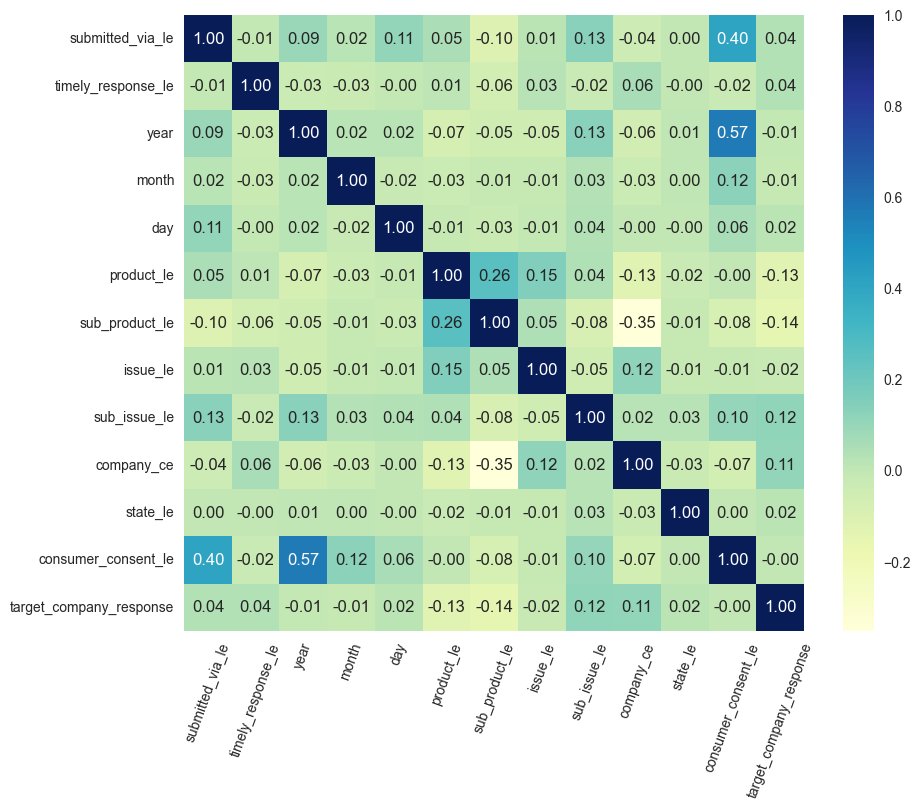

In [21]:
fig, ax = plt.subplots(figsize=(10,8))

hm= sns.heatmap(dfm.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [ ]:
df[['company_response_to_consumer', 'company_response_to_consumer']].drop_duplicates()